# Rhode Island Scraper from Google Sheet/CSV

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import zipfile
import pandas as pd
from io import StringIO
import requests
import csv
import time
import random
import matplotlib.pyplot as plt

## Creating Dataframe for RI Demographics by exporting GSheet as CSV

In [2]:
# original link ->https://docs.google.com/spreadsheets/d/1c2QrNMz8pIbYEKzMJL7Uh2dtThOJa2j1sSMwiDo5Gz4/edit#gid=31350783
# edited link to export as CSV

# URL is specific to the tab for demographics, so it only downloads this tab as a CSV and not the others
RhodeIslandCSVUrl = "https://docs.google.com/spreadsheets/d/1c2QrNMz8pIbYEKzMJL7Uh2dtThOJa2j1sSMwiDo5Gz4/export?format=csv&gid=31350783"

#reading from CSV
RhodeIslandDemographicsData = pd.read_csv(RhodeIslandCSVUrl)

## Cleaning the Dataframe

In [3]:
# the CSV includes data we don't need like age and sex, let's get rid of that so that our data frame only includes race
# and ethnicity data

#drop first 15 rows, as they contain age data not relevant to what we need
RhodeIslandDemographicsData = RhodeIslandDemographicsData.iloc[15:,]
#since we dropped some rows, let's recalculate the indeces again
RhodeIslandDemographicsData.reset_index(drop=True, inplace=True)

# drop rows indexed 11 - 41, since they contain sex/gender data
RhodeIslandDemographicsData = RhodeIslandDemographicsData.drop(RhodeIslandDemographicsData.index[11:41])
RhodeIslandDemographicsData.reset_index(drop=True, inplace=True)

#rename columns
RhodeIslandDemographicsData.rename(columns = {'Unnamed: 0':'Category'}, inplace = True)
RhodeIslandDemographicsData.rename(columns = {'All People Tested\n (Positive and Negative)':'All Tests'}, inplace = True)
RhodeIslandDemographicsData.rename(columns = {'Unnamed: 2':'% from Tests'}, inplace = True)
RhodeIslandDemographicsData.rename(columns = {'Cases':'Confirmed Cases'}, inplace = True)
RhodeIslandDemographicsData.rename(columns = {'Unnamed: 4':'% from Cases'}, inplace = True)
RhodeIslandDemographicsData.rename(columns = {'Unnamed: 6':'% from Hospitalizations'}, inplace = True)
RhodeIslandDemographicsData.rename(columns = {'Unnamed: 8':'% from Deaths'}, inplace = True)

# Mostly for aesthetic reasons, let's replace all 'Nan' values with '--', I find that this makes it easier to read
RhodeIslandDemographicsData = RhodeIslandDemographicsData.fillna('--')

# for small numbers, RI uses '<5', to keep with what the CRDT team does let's replace all '<5' values with '3'
RhodeIslandDemographicsData = RhodeIslandDemographicsData.replace(['<5'],'3')

# display dataframe, as you can tell it now only contains race and ethnicity data, as well as the last update time 
RhodeIslandDemographicsData




,Category,All Tests,% from Tests,Confirmed Cases,% from Cases,Hospitalizations,% from Hospitalizations,Deaths,% from Deaths
0,Race and Ethnicity,--,--,--,--,--,--,--,--
1,Hispanic or Latino†,36760,18%,16951,39%,1159,33%,128,11%
2,American Indian or Alaska Native*,4302,2%,129,<1%,6,<1%,3,--
3,Asian*,4799,2%,838,2%,73,2%,15,1%
4,Black or African American*,13159,7%,4152,9%,395,11%,73,6%
5,Native Hawaiian or Other Pacific Islander*,443,<1%,0,0%,0,0%,0,0%
6,White*,125391,63%,20585,47%,1752,50%,925,81%
7,Other race*,14927,7%,744,2%,70,2%,0,0%
8,Multiple race*,141,<1%,391,1%,15,<1%,0,0%
9,Declined,3681,--,647,--,18,--,0,--


## Visualizing the Race and Ethnicity Data

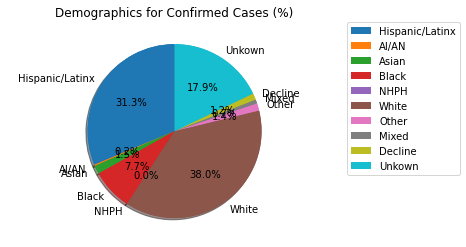

In [4]:
# Let's visualize the demographic data for confirmed cases in a pie chart
# to make things simpler, let's save our dataframe in a variable called df
df = RhodeIslandDemographicsData

labels = 'Hispanic/Latinx', 'AI/AN', 'Asian', 'Black', 'NHPH', 'White', 'Other', 'Mixed', 'Decline', 'Unkown'
sizes = [df.loc[1, 'Confirmed Cases'], df.loc[2, 'Confirmed Cases'], df.loc[3, 'Confirmed Cases'], df.loc[4, 'Confirmed Cases'], df.loc[5, 'Confirmed Cases'], df.loc[6, 'Confirmed Cases'], df.loc[7, 'Confirmed Cases'], df.loc[8, 'Confirmed Cases'], df.loc[9, 'Confirmed Cases'], df.loc[10, 'Confirmed Cases']]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches,labels, bbox_to_anchor=(1,1.025), loc="upper left")
plt.title('Demographics for Confirmed Cases (%)')
plt.show()


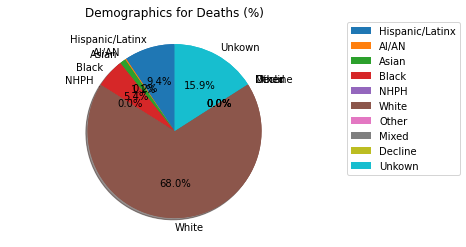

In [5]:
# Pie chart for Hospitalizations demographics 
df = RhodeIslandDemographicsData

labels = 'Hispanic/Latinx', 'AI/AN', 'Asian', 'Black', 'NHPH', 'White', 'Other', 'Mixed', 'Decline', 'Unkown'
sizes = [df.loc[1, 'Deaths'], df.loc[2, 'Deaths'], df.loc[3, 'Deaths'], df.loc[4, 'Deaths'], df.loc[5, 'Deaths'], df.loc[6, 'Deaths'], df.loc[7, 'Deaths'], df.loc[8, 'Deaths'], df.loc[9, 'Deaths'], df.loc[10, 'Deaths']]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches,labels, bbox_to_anchor=(1,1.025), loc="upper left")
plt.title('Demographics for Deaths (%)')
plt.show()

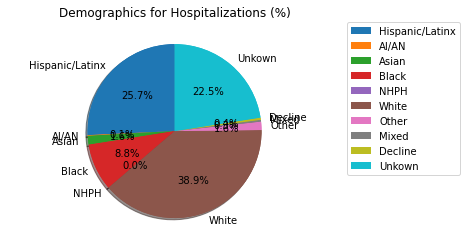

In [6]:
# Pie chart for Hospitalizations demographics

df = RhodeIslandDemographicsData

labels = 'Hispanic/Latinx', 'AI/AN', 'Asian', 'Black', 'NHPH', 'White', 'Other', 'Mixed', 'Decline', 'Unkown'
sizes = [df.loc[1, 'Hospitalizations'], df.loc[2, 'Hospitalizations'], df.loc[3, 'Hospitalizations'], df.loc[4, 'Hospitalizations'], df.loc[5, 'Hospitalizations'], df.loc[6, 'Hospitalizations'], df.loc[7, 'Hospitalizations'], df.loc[8, 'Hospitalizations'], df.loc[9, 'Hospitalizations'], df.loc[10, 'Hospitalizations']]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches,labels, bbox_to_anchor=(1,1.025), loc="upper left")
plt.title('Demographics for Hospitalizations (%)')
plt.show()

In [7]:
# RI keeps track of weekly trends by demographics as well, let's create some visualizations with this data,
# but first, since this data is in a different sheet, let's again repeat what we did earlier to import the 
# gsheet data, clean it, and create a data frame

# URl to this data -> https://docs.google.com/spreadsheets/d/1c2QrNMz8pIbYEKzMJL7Uh2dtThOJa2j1sSMwiDo5Gz4export?format=csv&gid=1074078949
RhodeIslandRaceTrendsUrl = "https://docs.google.com/spreadsheets/d/1c2QrNMz8pIbYEKzMJL7Uh2dtThOJa2j1sSMwiDo5Gz4/export?format=csv&gid=1074078949"
RhodeIslandRaceTrends = pd.read_csv(RhodeIslandRaceTrendsUrl)

#clean the data, so let's drop some unnecessary rows and rename some columns for easier reading
RhodeIslandRaceTrends = RhodeIslandRaceTrends.iloc[6:,] #drop first 5 rows

RhodeIslandRaceTrends.rename(columns = {'Number of COVID-19 Cases by Race and Ethnicity and Week of First Positive Test Date':'Week'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 1':'Hispanic or latino'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 2':'American Indian or Alaska Native'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 3':'Asian'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 4':'Black or African American'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 5':'Native Hawaiian / Pacific Islander'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 6':'White'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 7':'Other race'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 8':'Multiple race'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 9':'Declined'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 10':'Unknown/Pending'}, inplace = True)
RhodeIslandRaceTrends.rename(columns = {'Unnamed: 11':'Total'}, inplace = True)

# Replace any weird values
RhodeIslandRaceTrends = RhodeIslandRaceTrends.replace(['<5'],'3')
RhodeIslandRaceTrends = RhodeIslandRaceTrends.fillna('--')
# week values as they stand aren't numeric, for simplicity let's set them as the same as the index
# week 0 will be first week with cases detected, and so on
RhodeIslandRaceTrends['Week'] = [x for x in range(len(RhodeIslandRaceTrends.index))]

# To be able to plot, we need to ensure everything can be considered numeric
RhodeIslandRaceTrends.replace(',','', regex=True, inplace=True)
RhodeIslandRaceTrends = RhodeIslandRaceTrends.astype(float)

# Recalculate indexes 
RhodeIslandRaceTrends.reset_index(drop=True, inplace=True)

# Display the entire dataframe
RhodeIslandRaceTrends

,Week,Hispanic or latino,American Indian or Alaska Native,Asian,Black or African American,Native Hawaiian / Pacific Islander,White,Other race,Multiple race,Declined,Unknown/Pending,Total
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0
1,1.0,0.0,0.0,3.0,0.0,0.0,9.0,3.0,0.0,0.0,3.0,15.0
2,2.0,5.0,0.0,0.0,3.0,0.0,26.0,0.0,0.0,0.0,33.0,66.0
3,3.0,27.0,3.0,3.0,17.0,0.0,85.0,3.0,0.0,3.0,77.0,213.0
4,4.0,85.0,3.0,3.0,56.0,0.0,257.0,5.0,3.0,3.0,215.0,625.0
5,5.0,503.0,8.0,28.0,165.0,0.0,762.0,10.0,5.0,13.0,335.0,1829.0
6,6.0,743.0,11.0,24.0,217.0,0.0,603.0,10.0,10.0,25.0,293.0,1936.0
7,7.0,947.0,10.0,23.0,278.0,0.0,720.0,21.0,14.0,37.0,477.0,2527.0
8,8.0,750.0,6.0,42.0,231.0,0.0,481.0,17.0,7.0,26.0,433.0,1993.0
9,9.0,700.0,8.0,26.0,204.0,0.0,571.0,26.0,3.0,20.0,291.0,1849.0


## We can use this data to create line plots to show how cases have changed per demographic group

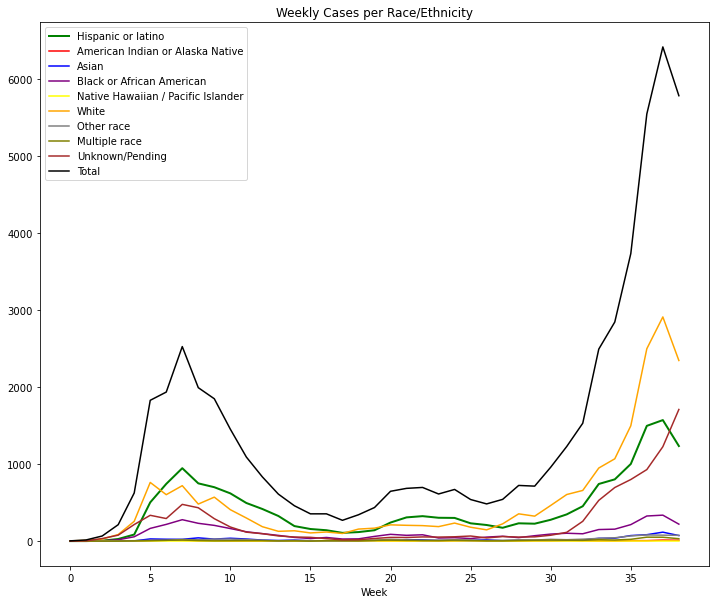

In [8]:
casesHL = RhodeIslandRaceTrends[['Week', 'Hispanic or latino']]
casesHL.set_index('Week', inplace=True)

casesAIAN = RhodeIslandRaceTrends[['Week', 'American Indian or Alaska Native']]
casesAIAN.set_index('Week', inplace=True)

casesAS = RhodeIslandRaceTrends[['Week', 'Asian']]
casesAS.set_index('Week', inplace=True)

casesBAA = RhodeIslandRaceTrends[['Week', 'Black or African American']]
casesBAA.set_index('Week', inplace=True)

casesNHPI = RhodeIslandRaceTrends[['Week', 'Native Hawaiian / Pacific Islander']]
casesNHPI.set_index('Week', inplace=True)

casesWH = RhodeIslandRaceTrends[['Week', 'White']]
casesWH.set_index('Week', inplace=True)

casesOTH = RhodeIslandRaceTrends[['Week', 'Other race']]
casesOTH.set_index('Week', inplace=True)

casesDCL = RhodeIslandRaceTrends[['Week', 'Declined']]
casesDCL.set_index('Week', inplace=True)

casesMLT = RhodeIslandRaceTrends[['Week', 'Multiple race']]
casesMLT.set_index('Week', inplace=True)

casesUNK = RhodeIslandRaceTrends[['Week', 'Unknown/Pending']]
casesUNK.set_index('Week', inplace=True)

casesTOTAL = RhodeIslandRaceTrends[['Week', 'Total']]
casesTOTAL.set_index('Week', inplace=True)

#plot all in same graph
ax = casesHL.plot(figsize=(12, 10), title='Weekly Cases per Race/Ethnicity',linewidth=2, color='green')
casesAIAN.plot(ax=ax, color='red')
casesAS.plot(ax=ax, color='blue')
casesBAA.plot(ax=ax, color='purple')
casesNHPI.plot(ax=ax, color='yellow')
casesWH.plot(ax=ax, color='orange')
casesOTH.plot(ax=ax, color='gray')
casesMLT.plot(ax=ax, color='olive')
casesUNK.plot(ax=ax, color='brown')
casesTOTAL.plot(ax=ax, color='black')

## Rate of COVID-19 cases per 100,000: Race and Ethnicity Data

In [9]:
# RI has sheet dedicated to showing cases per 100k trends using race and ethnicity data
# again, let's repeat our prior steps and import the csv, then use it to build our dataframe

RhodeIslandCasesPer100URL = "https://docs.google.com/spreadsheets/d/1c2QrNMz8pIbYEKzMJL7Uh2dtThOJa2j1sSMwiDo5Gz4/export?format=csv&gid=2131764372"
RhodeIslandCasesPer100 = pd.read_csv(RhodeIslandCasesPer100URL)

# time to clean the data frame
# drop first 7 columns (contain irrelevant data)
RhodeIslandCasesPer100 = RhodeIslandCasesPer100.iloc[7:,]

# RI is displaying small numbers ( <5 ) as '*' so let's convert these to the number 3 in the dataframe
RhodeIslandCasesPer100 = RhodeIslandCasesPer100.replace(['*'],'3')

# time to rename some columns
RhodeIslandCasesPer100.rename(columns = {'Rate of COVID-19 Cases per 100,000 by Race and Ethnicity and Week of First Positive Test Date':'Week'}, inplace = True)
RhodeIslandCasesPer100.rename(columns = {'Unnamed: 1':'Hispanic/Latinx'}, inplace = True)
RhodeIslandCasesPer100.rename(columns = {'Unnamed: 2':'AIAN'}, inplace = True)
RhodeIslandCasesPer100.rename(columns = {'Unnamed: 3':'Asian'}, inplace = True)
RhodeIslandCasesPer100.rename(columns = {'Unnamed: 4':'Black/African American'}, inplace = True)
RhodeIslandCasesPer100.rename(columns = {'Unnamed: 5':'Native Hawaiian/Pacific Islander'}, inplace = True)
RhodeIslandCasesPer100.rename(columns = {'Unnamed: 6':'White'}, inplace = True)
RhodeIslandCasesPer100.rename(columns = {'Unnamed: 7':'Other race'}, inplace = True)
RhodeIslandCasesPer100.rename(columns = {'Unnamed: 8':'Multiple race'}, inplace = True)
RhodeIslandCasesPer100.rename(columns = {'Unnamed: 9':'Total'}, inplace = True)

# convert/drop any non numerical values
# week values as they stand aren't numeric, for simplicity let's set them as the same as the index
# week 0 will be first week with cases detected, and so on
RhodeIslandCasesPer100['Week'] = [x for x in range(len(RhodeIslandRaceTrends.index))]

# To be able to plot, we need to ensure everything can be considered numeric
RhodeIslandCasesPer100.replace(',','', regex=True, inplace=True)
RhodeIslandCasesPer100 = RhodeIslandCasesPer100.astype(float)

# recalculate row indexes
RhodeIslandCasesPer100.reset_index(drop=True, inplace=True)

RhodeIslandCasesPer100

,Week,Hispanic/Latinx,AIAN,Asian,Black/African American,Native Hawaiian/Pacific Islander,White,Other race,Multiple race,Total
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0
1,1.0,0.0,0.0,3.0,0.0,0.0,1.0,3.0,0.0,1.0
2,2.0,3.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,6.0
3,3.0,17.0,3.0,3.0,29.0,0.0,11.0,3.0,0.0,20.0
4,4.0,54.0,3.0,3.0,95.0,0.0,33.0,71.0,3.0,59.0
5,5.0,317.0,216.0,80.0,280.0,0.0,99.0,141.0,20.0,173.0
6,6.0,468.0,297.0,68.0,368.0,0.0,79.0,141.0,41.0,183.0
7,7.0,596.0,270.0,65.0,471.0,0.0,94.0,296.0,57.0,239.0
8,8.0,472.0,162.0,120.0,392.0,0.0,63.0,240.0,29.0,189.0
9,9.0,441.0,216.0,74.0,346.0,0.0,74.0,367.0,3.0,175.0


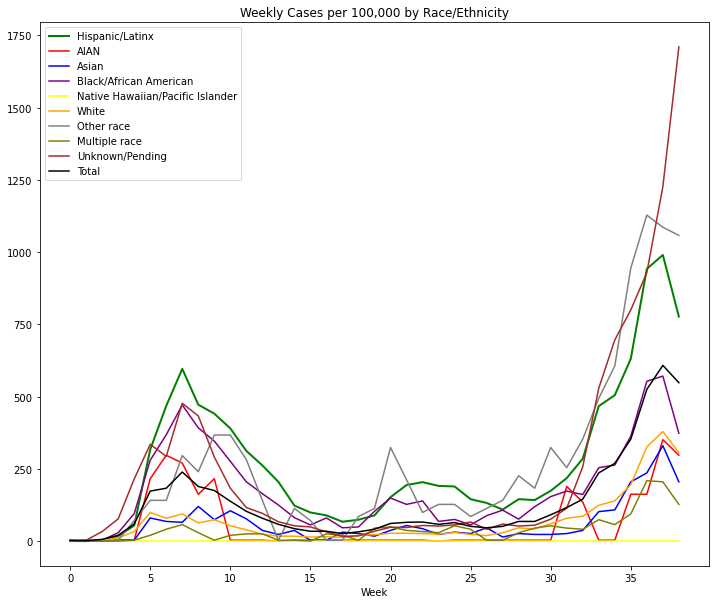

In [10]:
casesHL = RhodeIslandCasesPer100[['Week', 'Hispanic/Latinx']]
casesHL.set_index('Week', inplace=True)

casesAIAN = RhodeIslandCasesPer100[['Week', 'AIAN']]
casesAIAN.set_index('Week', inplace=True)

casesAS = RhodeIslandCasesPer100[['Week', 'Asian']]
casesAS.set_index('Week', inplace=True)

casesBAA = RhodeIslandCasesPer100[['Week', 'Black/African American']]
casesBAA.set_index('Week', inplace=True)

casesNHPI = RhodeIslandCasesPer100[['Week', 'Native Hawaiian/Pacific Islander']]
casesNHPI.set_index('Week', inplace=True)

casesWH = RhodeIslandCasesPer100[['Week', 'White']]
casesWH.set_index('Week', inplace=True)

casesOTH = RhodeIslandCasesPer100[['Week', 'Other race']]
casesOTH.set_index('Week', inplace=True)

casesMLT = RhodeIslandCasesPer100[['Week', 'Multiple race']]
casesMLT.set_index('Week', inplace=True)

casesTOTAL = RhodeIslandCasesPer100[['Week', 'Total']]
casesTOTAL.set_index('Week', inplace=True)

#plot all in same graph
ax = casesHL.plot(figsize=(12, 10), title='Weekly Cases per 100,000 by Race/Ethnicity',linewidth=2, color='green')
casesAIAN.plot(ax=ax, color='red')
casesAS.plot(ax=ax, color='blue')
casesBAA.plot(ax=ax, color='purple')
casesNHPI.plot(ax=ax, color='yellow')
casesWH.plot(ax=ax, color='orange')
casesOTH.plot(ax=ax, color='gray')
casesMLT.plot(ax=ax, color='olive')
casesUNK.plot(ax=ax, color='brown')
casesTOTAL.plot(ax=ax, color='black')

## Now, let's do the same thing but to create a data frame for the case, death, and hospitalization totals

In [11]:
# Let's get the URL specific to the tab that has the totals, this is the 'Summary' tab. 
# Just like earlier, let's create our dataframe by reading this CSV

RhodeIslandTotalsUrl = "https://docs.google.com/spreadsheets/d/1c2QrNMz8pIbYEKzMJL7Uh2dtThOJa2j1sSMwiDo5Gz4/export?format=csv&gid=264100583"
RhodeIslandTotals = pd.read_csv(RhodeIslandTotalsUrl)

# The dataframe as it stands now has lots of data we don't need,
# let's clean it so we only display totals for cases, deaths, and hospitilizations

RhodeIslandTotals = RhodeIslandTotals.iloc[9:,]
RhodeIslandTotals = RhodeIslandTotals.drop([10,11,13,15,16,17,18,19,20,21,22,23,25,26])

#let's rename the rows to make it easier to read
RhodeIslandTotals.rename(index = {'Total deaths':'TOTAL DEATHS'}, inplace = True)
RhodeIslandTotals = RhodeIslandTotals.replace(['Cumulative people tested (one count per person)'],'Total People Tested')
RhodeIslandTotals = RhodeIslandTotals.replace(['Cumulative hospital admissions'],'Total Hospitalizations')
RhodeIslandTotals = RhodeIslandTotals.replace(['Cumulative people who tested positive (counts first positive lab per person)'],'Total Cases')

RhodeIslandTotals

,Last updated:,12/7/2020
9,Total Cases,65818
12,Total People Tested,556960
14,Total Hospitalizations,5039
24,Total deaths,1448


## Let's plot some trends and get some other facts about the data (data about the data! 😮)

In [12]:
RhodeIslandTrendsURl = "https://docs.google.com/spreadsheets/d/1c2QrNMz8pIbYEKzMJL7Uh2dtThOJa2j1sSMwiDo5Gz4/export?format=csv&gid=1592746937"
RhodeIslandTrends = pd.read_csv(RhodeIslandTrendsURl)

#Display the entire data frame 
RhodeIslandTrends

,Date,Daily number of positive tests (may count people more than once),3-day average of daily number of positive tests (may count people more than once),Cumulative positive tests (may count people more than once),Daily number of negative tests (may count people more than once),Cumulative negative tests (may count people more than once),Daily total tests completed (may count people more than once),Cumulative total tests completed (may count people more than once),New people who tested positive (counts first positive lab per person),3-day average of new people who tested positive (counts first positive lab per person),...,New hospital discharges,Cumulative hospital discharges,Hospital deaths,Cumulative hospital deaths,Currently hospitalized,3-day average of currently hospitalized,Currently in ICU,Currently vented,Date of death,Total deaths
0,2/27/2020,0,--,0,0,0,0,0,0,--,...,0.0,0.0,0.0,0.0,1.0,--,0.0,0.0,0,0
1,2/28/2020,0,--,0,0,0,0,0,0,--,...,0.0,0.0,0.0,0.0,1.0,--,1.0,0.0,0,0
2,2/29/2020,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0,0
3,3/1/2020,2,1,2,2,2,4,4,2,1,...,0.0,0.0,0.0,0.0,1.0,1,1.0,1.0,0,0
4,3/2/2020,0,1,2,1,3,1,5,0,1,...,0.0,0.0,0.0,0.0,2.0,1,2.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,12/2/2020,1546,1454,74632,15570,1520950,17116,1595582,1413,1324,...,50.0,3943.0,7.0,497.0,425.0,427,47.0,30.0,14,1410
280,12/3/2020,1741,1609,76373,14625,1535575,16366,1611948,1618,1479,...,74.0,4017.0,5.0,502.0,408.0,420,45.0,31.0,9,1419
281,12/4/2020,1585,1624,77958,16458,1552033,18043,1629991,1450,1494,...,48.0,4065.0,7.0,509.0,410.0,414,42.0,30.0,10,1429
282,12/5/2020,1193,1506,79151,12581,1564614,13774,1643765,1030,1366,...,39.0,4104.0,4.0,513.0,422.0,413,45.0,30.0,8,1437


In [13]:
# RI doesn't just track the running total, but also new cases per day, let's show this table and plot this

RhodeIslandNewTotals = RhodeIslandTrends[['Date', 'Daily number of positive tests (may count people more than once)']]
RhodeIslandNewTotals

,Date,Daily number of positive tests (may count people more than once)
0,2/27/2020,0
1,2/28/2020,0
2,2/29/2020,0
3,3/1/2020,2
4,3/2/2020,0
...,...,...
279,12/2/2020,1546
280,12/3/2020,1741
281,12/4/2020,1585
282,12/5/2020,1193


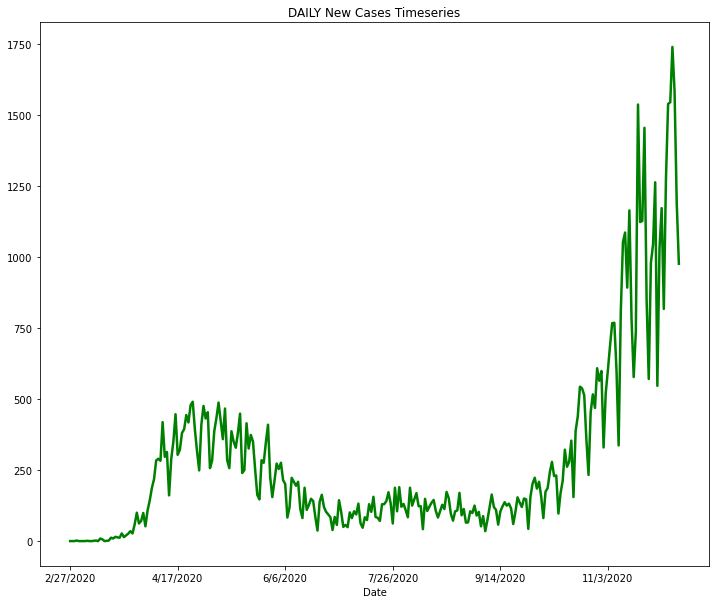

In [14]:
# We can even make a line graph to track the new cases per day!
RhodeIslandNewTotals.set_index('Date')['Daily number of positive tests (may count people more than once)'].plot(figsize=(12, 10), title='DAILY New Cases Timeseries'
                                                                        ,linewidth=2.5, color='green')

#filter data into 7 sets of data (each every 7 days, plot those individually) to figure out if certain days have dips, etc. 
#you can consider using  a bar chart and color coding

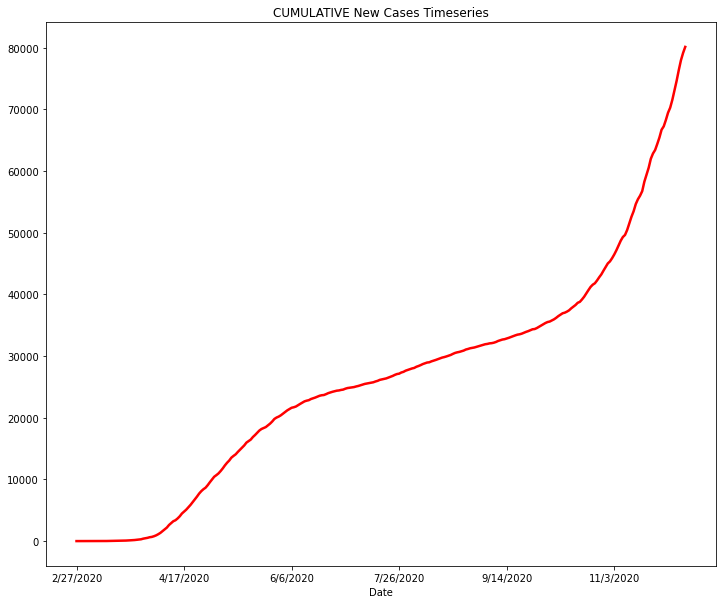

In [15]:
# or, we can plot the cumulative new cases too!
# RhodeIslandTrends
RhodeIslandCumulativeTotals = RhodeIslandTrends[['Date', 'Cumulative positive tests (may count people more than once)']]
RhodeIslandCumulativeTotals.set_index('Date')['Cumulative positive tests (may count people more than once)'].plot(figsize=(12, 10), title='CUMULATIVE New Cases Timeseries'
                                                                        ,linewidth=2.5, color='red')

In [16]:
# Let's plot other important data to track for abnormalities, we'll plot both new deaths and new hospitilizations per day
RhodeIslandNewHospitalTotals = RhodeIslandTrends[['Date', 'New hospital admissions']]
RhodeIslandNewHospitalTotals
# RhodeIslandNewHospitalTotals.set_index('Date')['New hospital admissions'].plot(figsize=(12, 10), title='DAILY New Hospital Admissions Timeseries'
#                                                                         ,linewidth=2.5, color='blue')

#visualizing standard deviations
#have an upper and lower bound (similar to regressions), plot stdev, use a 20-day window 
#

,Date,New hospital admissions
0,2/27/2020,1.0
1,2/28/2020,0.0
2,2/29/2020,0.0
3,3/1/2020,0.0
4,3/2/2020,1.0
...,...,...
279,12/2/2020,54.0
280,12/3/2020,62.0
281,12/4/2020,57.0
282,12/5/2020,55.0


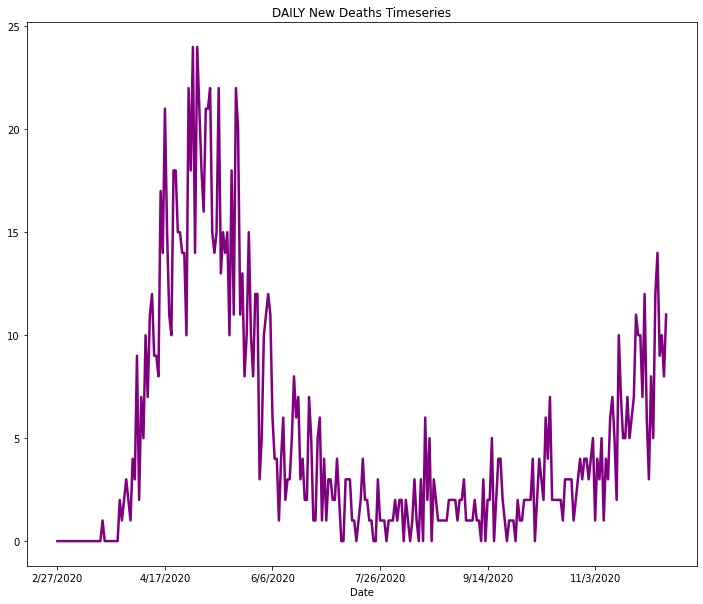

In [17]:
RhodeIslandNewDeathTotals = RhodeIslandTrends[['Date', 'Date of death']]
RhodeIslandNewDeathTotals.set_index('Date')['Date of death'].plot(figsize=(12, 10), title='DAILY New Deaths Timeseries'
                                                                        ,linewidth=2.5, color='purple')